 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dengue_dataset = pd.read_csv('/content/drive/MyDrive/422 project/dengue dataset.csv')

dengue_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7   HouseType  1000 non-null   object
 8   District   1000 non-null   object
 9   Outcome    1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Dataset description

In [4]:
dengue_dataset.shape

(1000, 10)

In [5]:
print("Keys of dataset:\n", dengue_dataset.keys())

Keys of dataset:
 Index(['Gender', 'Age', 'NS1', 'IgG', 'IgM', 'Area', 'AreaType', 'HouseType',
       'District', 'Outcome'],
      dtype='object')


In [6]:
dengue_dataset['Outcome'].unique()

array([0, 1])

Text(0, 0.5, 'Count')

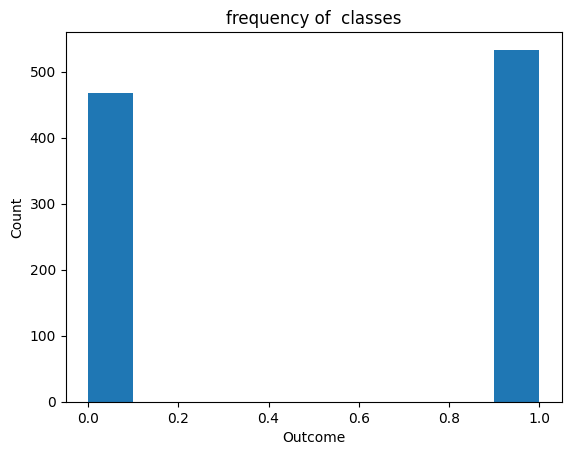

In [7]:
outcome_counts = dengue_dataset['Outcome']
fig,ax = plt.subplots()
ax.hist(outcome_counts)
ax.set_title('frequency of  classes')
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')


In [8]:
dengue_dataset.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


**Data Pre-processing**

In [9]:
dengue_dataset.isnull()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [10]:
dengue_dataset.isnull().sum()

Gender       0
Age          0
NS1          0
IgG          0
IgM          0
Area         0
AreaType     0
HouseType    0
District     0
Outcome      0
dtype: int64

In [11]:
gender = dengue_dataset['Gender']
dengue_dataset = dengue_dataset.drop('Gender', axis=1)
dengue_dataset.shape

(1000, 9)

In [12]:
dengue_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        1000 non-null   int64 
 1   NS1        1000 non-null   int64 
 2   IgG        1000 non-null   int64 
 3   IgM        1000 non-null   int64 
 4   Area       1000 non-null   object
 5   AreaType   1000 non-null   object
 6   HouseType  1000 non-null   object
 7   District   1000 non-null   object
 8   Outcome    1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Encoding

In [13]:
dengue_dataset.head()

,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [14]:
dengue_dataset['Area'].unique()
#print(len(dengue_dataset['Area'].unique()))

array(['Mirpur', 'Chawkbazar', 'Paltan', 'Motijheel', 'Gendaria',
       'Dhanmondi', 'New Market', 'Sher-e-Bangla Nagar', 'Kafrul',
       'Pallabi', 'Mohammadpur', 'Shahbagh', 'Shyampur', 'Kalabagan',
       'Bosila', 'Jatrabari', 'Adabor', 'Kamrangirchar', 'Biman Bandar',
       'Ramna', 'Badda', 'Bangshal', 'Sabujbagh', 'Hazaribagh',
       'Sutrapur', 'Lalbagh', 'Demra', 'Banasree', 'Cantonment',
       'Keraniganj', 'Tejgaon', 'Khilkhet', 'Kadamtali', 'Gulshan',
       'Rampura', 'Khilgaon'], dtype=object)

In [15]:
area_enc = pd.get_dummies(dengue_dataset['Area'], dtype=int)

area_enc.head()


,Adabor,Badda,Banasree,Bangshal,Biman Bandar,Bosila,Cantonment,Chawkbazar,Demra,Dhanmondi,...,Pallabi,Paltan,Ramna,Rampura,Sabujbagh,Shahbagh,Sher-e-Bangla Nagar,Shyampur,Sutrapur,Tejgaon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dengue_dataset['AreaType'].unique()
#print(len(dengue_dataset['AreaType'].unique()))

array(['Undeveloped', 'Developed'], dtype=object)

In [17]:
dengue_dataset['AreaType'] = dengue_dataset['AreaType'].map({'Undeveloped':0,'Developed':1})

In [18]:
dengue_dataset.head()

,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,45,0,0,0,Mirpur,0,Building,Dhaka,0
1,17,0,0,1,Chawkbazar,1,Building,Dhaka,0
2,29,0,0,0,Paltan,0,Other,Dhaka,0
3,63,1,1,0,Motijheel,1,Other,Dhaka,1
4,22,0,0,0,Gendaria,0,Building,Dhaka,0


In [19]:
dengue_dataset['HouseType'].unique()
#print(len(dengue_dataset['HouseType'].unique()))

array(['Building', 'Other', 'Tinshed'], dtype=object)

In [20]:
dengue_dataset['HouseType'] = dengue_dataset['HouseType'].map({'Building':0,'Other':1, 'Tinshed':2})
dengue_dataset.head()

,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,45,0,0,0,Mirpur,0,0,Dhaka,0
1,17,0,0,1,Chawkbazar,1,0,Dhaka,0
2,29,0,0,0,Paltan,0,1,Dhaka,0
3,63,1,1,0,Motijheel,1,1,Dhaka,1
4,22,0,0,0,Gendaria,0,0,Dhaka,0


In [21]:
dengue_dataset['District'].unique()
#print(len(dengue_dataset['District'].unique()))

array(['Dhaka'], dtype=object)

In [22]:
#todrop=['District', 'Area', 'Age']
todrop=['District', 'Area']
#todrop=['District', 'Area', 'AreaType', 'HouseType']
dengue_dataset_new = dengue_dataset.drop(todrop, axis=1)
dengue_dataset_new.shape

(1000, 7)

In [23]:
dengue_dataset_new.head()

,Age,NS1,IgG,IgM,AreaType,HouseType,Outcome
0,45,0,0,0,0,0,0
1,17,0,0,1,1,0,0
2,29,0,0,0,0,1,0
3,63,1,1,0,1,1,1
4,22,0,0,0,0,0,0


In [24]:
features = dengue_dataset_new.drop(columns=['Outcome'])
target = dengue_dataset_new['Outcome']
#dengue_dataset_encoded=pd.concat([features, area_enc, target], axis=1)
dengue_dataset_encoded=pd.concat([features, target], axis=1)
dengue_dataset_encoded.head()

,Age,NS1,IgG,IgM,AreaType,HouseType,Outcome
0,45,0,0,0,0,0,0
1,17,0,0,1,1,0,0
2,29,0,0,0,0,1,0
3,63,1,1,0,1,1,1
4,22,0,0,0,0,0,0


In [25]:
dengue_dataset_encoded.head()


,Age,NS1,IgG,IgM,AreaType,HouseType,Outcome
0,45,0,0,0,0,0,0
1,17,0,0,1,1,0,0
2,29,0,0,0,0,1,0
3,63,1,1,0,1,1,1
4,22,0,0,0,0,0,0


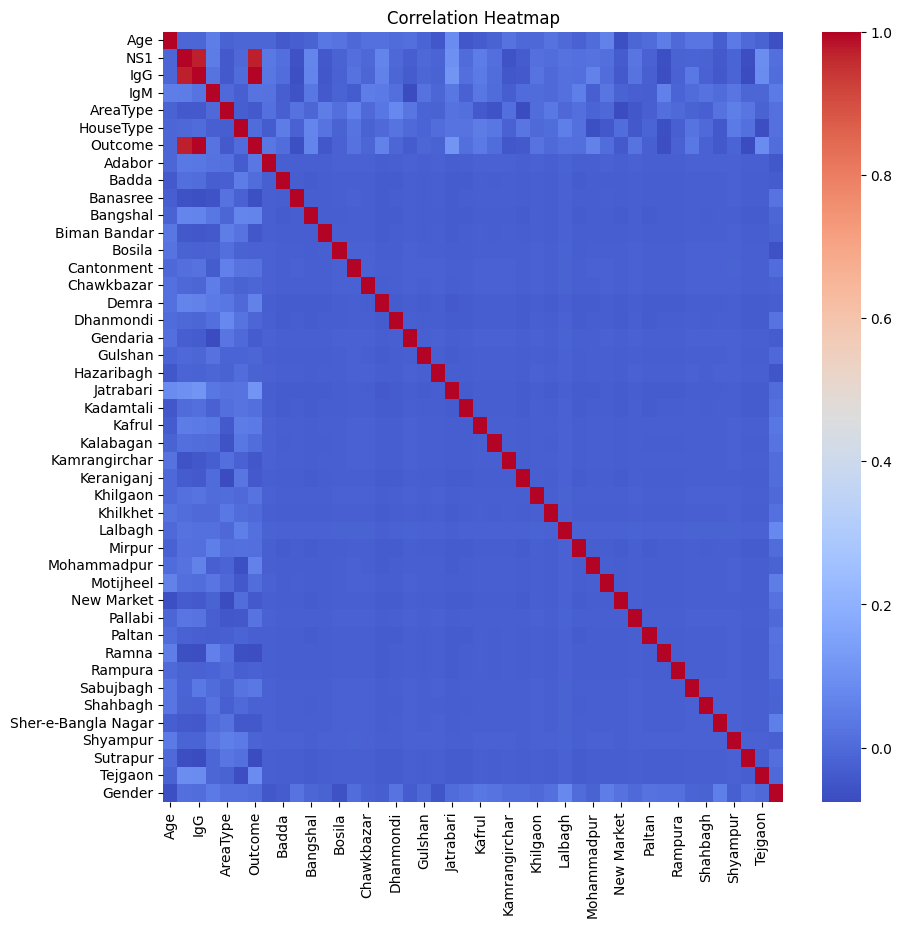

In [26]:
import seaborn as sns

gender = gender.map({'Male': 0, 'Female': 1})
dengue_dataset['AreaType'] = dengue_dataset['AreaType'].map({'Undeveloped':0,'Developed':1})
nodropping = pd.concat([dengue_dataset_new, area_enc, gender], axis=1)

corr_matrix = nodropping.corr()


plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

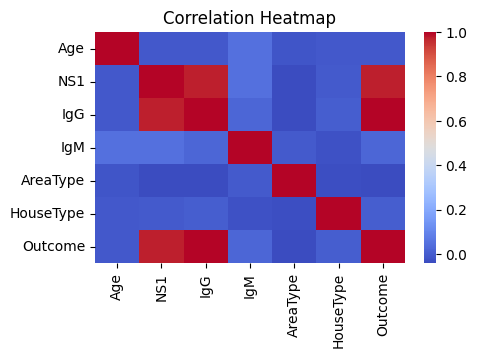

In [27]:
import seaborn as sns

corr_matrix = dengue_dataset_encoded.corr()

plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='NS1', ylabel='Age'>,
        <Axes: xlabel='IgG', ylabel='Age'>,
        <Axes: xlabel='IgM', ylabel='Age'>,
        <Axes: xlabel='AreaType', ylabel='Age'>,
        <Axes: xlabel='HouseType', ylabel='Age'>,
        <Axes: xlabel='Outcome', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='NS1'>,
        <Axes: xlabel='NS1', ylabel='NS1'>,
        <Axes: xlabel='IgG', ylabel='NS1'>,
        <Axes: xlabel='IgM', ylabel='NS1'>,
        <Axes: xlabel='AreaType', ylabel='NS1'>,
        <Axes: xlabel='HouseType', ylabel='NS1'>,
        <Axes: xlabel='Outcome', ylabel='NS1'>],
       [<Axes: xlabel='Age', ylabel='IgG'>,
        <Axes: xlabel='NS1', ylabel='IgG'>,
        <Axes: xlabel='IgG', ylabel='IgG'>,
        <Axes: xlabel='IgM', ylabel='IgG'>,
        <Axes: xlabel='AreaType', ylabel='IgG'>,
        <Axes: xlabel='HouseType', ylabel='IgG'>,
        <Axes: xlabel='Outcome', ylabel='IgG'>],
       [<Axes: xlabel='Age',

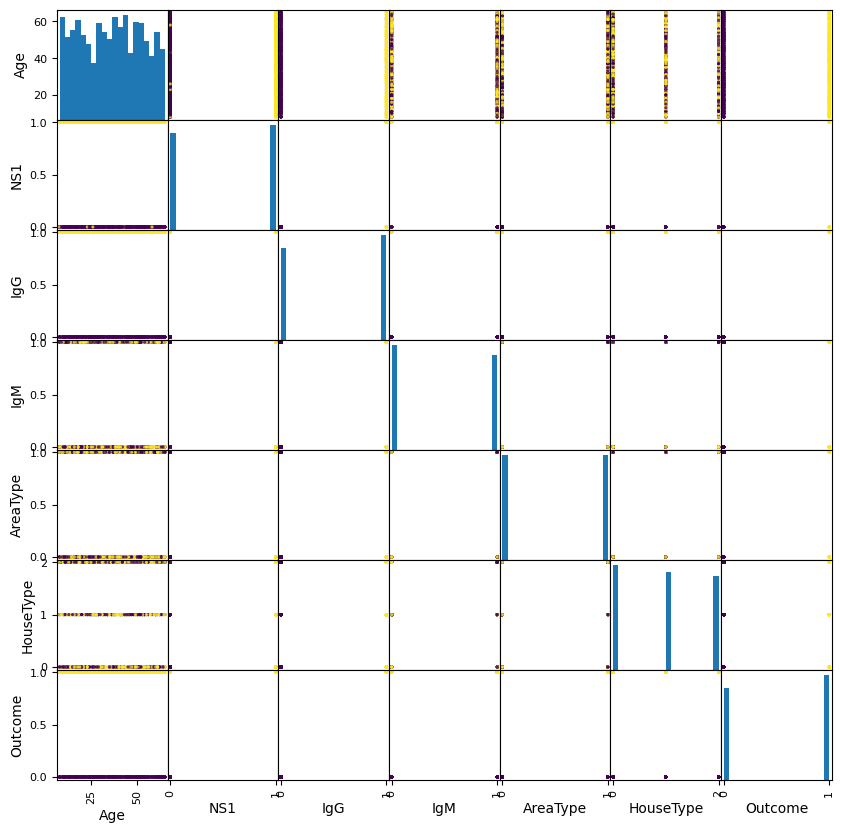

In [28]:
from pandas.plotting import scatter_matrix
outcome_counts = dengue_dataset_encoded['Outcome']
feature_names = ["Age", "NS1", "IgG", "IgM", "AreaType","HouseType" "Outcome"]
dengue_dataframe = pd.DataFrame(dengue_dataset_encoded, columns=feature_names)

pd.plotting.scatter_matrix(dengue_dataset_encoded, c=outcome_counts, figsize=(10, 10),
                            hist_kwds={'bins': 20}, s=20,
                           alpha=.8)

Dataset split

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=20)


# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [30]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (700, 6)
y_train shape: (700,)
X_test shape: (300, 6)
y_test shape: (300,)


KNN model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train, y_train) #train

KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
#print(y_test)

Test set predictions:
 [1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 1 0]


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {:.4f}%".format(accuracy * 100))

precision = precision_score(y_test, y_pred, average='binary')
print("Precision = {:.4f}%".format(precision * 100))

recall = recall_score(y_test, y_pred, average='binary')
print("Recall = {:.4f}%".format(recall * 100))

f1 = f1_score(y_test, y_pred, average='binary')
print("F1 score = {:.4f}%".format(f1 * 100))



Accuracy = 98.6667%
Precision = 100.0000%
Recall = 97.5758%
F1 score = 98.7730%


In [36]:
matKNN=confusion_matrix(y_pred, y_test)
print(matKNN)

[[135   4]
 [  0 161]]


<Axes: >

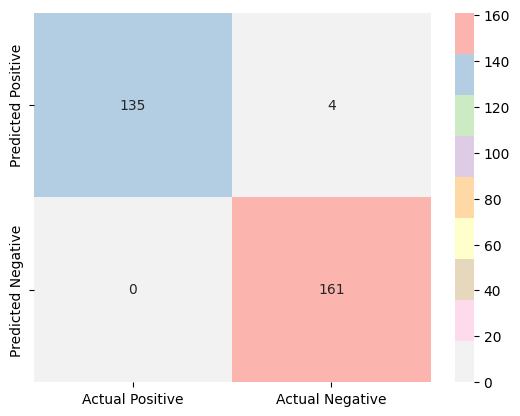

In [37]:
from seaborn import heatmap
heatmap(matKNN , cmap="Pastel1_r", xticklabels=['Actual Positive' ,'Actual Negative'], yticklabels=['Predicted Positive' ,'Predicted Negative'], annot=True,fmt='d')

Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [39]:
#model = LogisticRegression(max_iter=10)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
print(y_test)

[1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 1 0]
890    1
694    0
798    0
147    1
858    0
      ..
257    0
591    0
377    0
938    1
57     0
Name: Outcome, Length: 300, dtype: int64


In [40]:
accuracyL = accuracy_score(y_test, predictions)
print("Accuracy = {:.4f}%".format(accuracyL * 100))

precisionL = precision_score(y_test, predictions, average='binary')
print("Precision = {:.4f}%".format(precisionL * 100))

recallL = recall_score(y_test, predictions, average='binary')
print("Recall = {:.4f}%".format(recallL * 100))

f1L = f1_score(y_test, predictions, average='binary')
print("F1 score = {:.4f}%".format(f1L * 100))

Accuracy = 100.0000%
Precision = 100.0000%
Recall = 100.0000%
F1 score = 100.0000%


In [41]:
matL=confusion_matrix(predictions, y_test)
print(matL)

[[135   0]
 [  0 165]]


<Axes: >

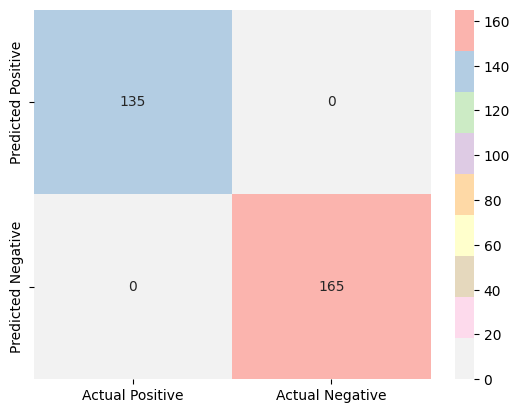

In [42]:
from seaborn import heatmap
heatmap(matL , cmap="Pastel1_r", xticklabels=['Actual Positive' ,'Actual Negative'], yticklabels=['Predicted Positive' ,'Predicted Negative'], annot=True,fmt='d')

Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [44]:
print("The Training accuracy of the model is {:.4f}".format(rfc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.4f}".format(rfc.score(X_test, y_test)))


The Training accuracy of the model is 0.9957
The Testing accuracy of the model is 0.9867


In [45]:
predictions2 = rfc.predict(X_test)

In [46]:
accuracyforest = accuracy_score(y_test, predictions2)
print("Accuracy = {:.4f}%".format(accuracyforest * 100))

precisionforest = precision_score(y_test, predictions2, average='binary')
print("Precision = {:.4f}%".format(precisionforest * 100))

recallforest = recall_score(y_test, predictions2, average='binary')
print("Recall = {:.4f}%".format(recallforest * 100))

f1forest = f1_score(y_test, predictions2, average='binary')
print("F1 score = {:.4f}%".format(f1forest * 100))

Accuracy = 98.6667%
Precision = 100.0000%
Recall = 97.5758%
F1 score = 98.7730%


In [47]:
matforest = confusion_matrix(predictions2, y_test)
print(matforest)

[[135   4]
 [  0 161]]


<Axes: >

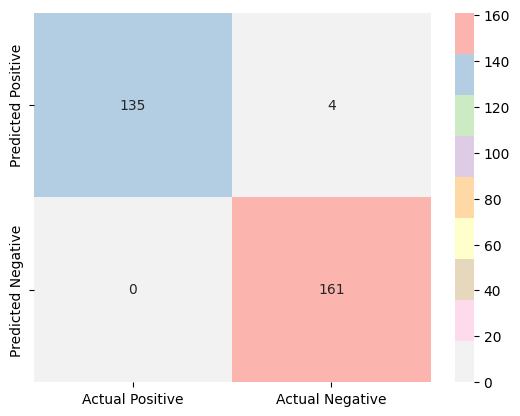

In [48]:
from seaborn import heatmap
heatmap(matforest , cmap="Pastel1_r", xticklabels=['Actual Positive' ,'Actual Negative'], yticklabels=['Predicted Positive' ,'Predicted Negative'], annot=True,fmt='d')

Comparisons


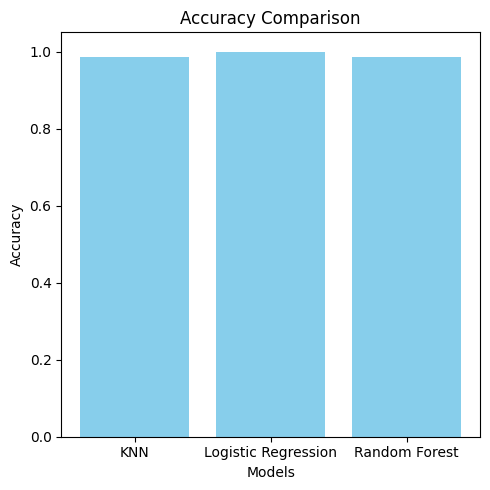

In [49]:
models = ['KNN', 'Logistic Regression', 'Random Forest']

accuracy_values = [accuracy, accuracyL, accuracyforest]

plt.figure(figsize=(5, 5))
plt.bar(models, accuracy_values, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.tight_layout()
plt.show()



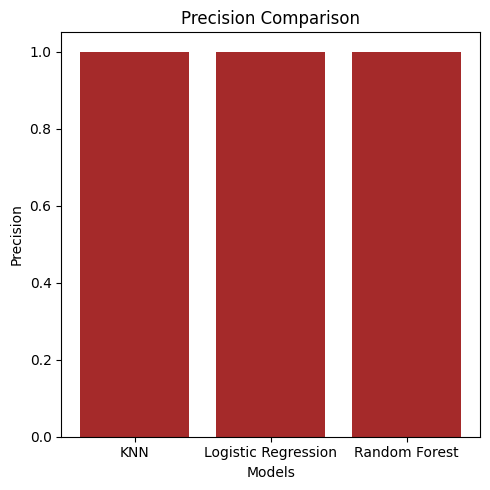

In [50]:
import matplotlib.pyplot as plt

models = ['KNN', 'Logistic Regression', 'Random Forest']

precision_values = [precision, precisionL, precisionforest]

plt.figure(figsize=(5, 5))
plt.bar(models, precision_values, color='brown')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.xlabel('Models')
plt.tight_layout()
plt.show()


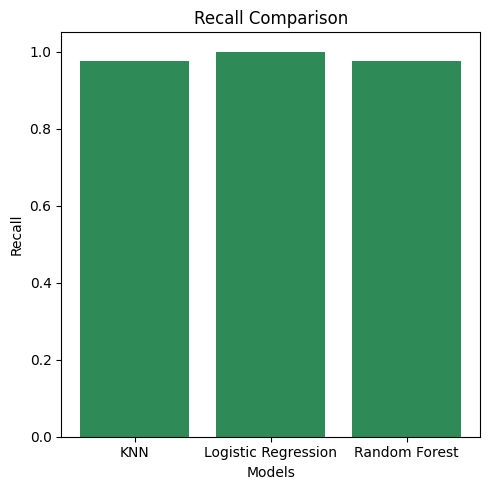

In [51]:
import matplotlib.pyplot as plt

models = ['KNN', 'Logistic Regression', 'Random Forest']

recall_values = [recall, recallL, recallforest]

plt.figure(figsize=(5, 5))
plt.bar(models, recall_values, color='seagreen')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.xlabel('Models')
plt.tight_layout()
plt.show()


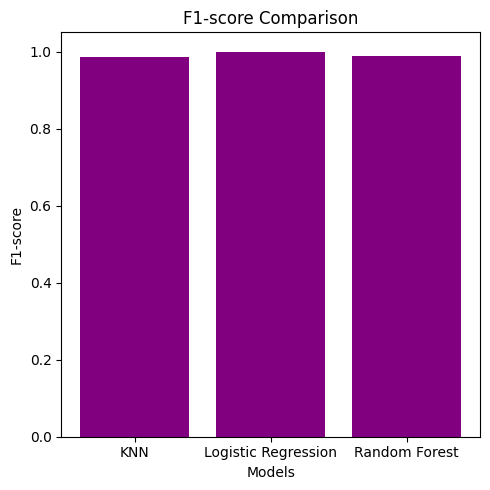

In [52]:
import matplotlib.pyplot as plt

models = ['KNN', 'Logistic Regression', 'Random Forest']

f1_score_values = [f1, f1L, f1forest]

plt.figure(figsize=(5, 5))
plt.bar(models, f1_score_values, color='purple')
plt.title('F1-score Comparison')
plt.ylabel('F1-score')
plt.xlabel('Models')
plt.tight_layout()
plt.show()
